# Machine Learning Applied to Weather Forecasting

## Introduction 

La prévision météorologique est la tâche de prédire l'état de l'atmosphère à une date future et dans une région spécifique. Habituellement, cette prévision a été fait grâce à des simulations physiques dans lesquelles l'atmosphère est modélisée comme un fluide. L'état futur de l'atmosphère est calculé en résolvant numériquement des équations de la dynamique des fluides et de la thermodynamique. Cependant, le système des équations différentielles ordinaires qui régissent ce modèle physique est instable à cause des perturbations. De plus  les incertitudes  dans les mesures initiales des conditions atmosphèriques et la compréhension  incomplète des processus atmosphériques complexes restreignent la précision des prévisions au-delà petite période (environ 10 jours). Le Machine Learning, à l'inverse, est relativement robuste aux perturbations et n'impose pas une compréhension compléte des processus physiques qui régissent l'atmosphère. Par conséquent, Le Machine Learning peut représenter une alternative fiable pour le forecasting météorologique.

Dés lors, ce projet a pour but  d'utiliser Python et Machine Learning dans le but d'établir des modèles de prévision de la température à base des données collectées à partir de la plate-forme Underground. Au cours de ce projet, nous allons mettre l'accent sur les différentes étapes permettant de bien réussir un projet Machine Learning via la méthode <i>CRISP-DM</i>. Ci-dessous le plan qui sera examiné tout au long de la première partie de mon PFE :  

---

<b>
1. Collecte et traitement de données 
2. Modèle ARIMA de prévision
3. Modèle Régression Linéaire
4. Modèle Réseau de neurones
</b>

---

## Problématique :


Nous nous intérressons à l'étude de la variable climatique "Témperature" dans le but d'étudier son intercation  avec d'autres variables climatiques et de trouver un bon modéle statistique qui permet de faire son forecasting.

## Formalisation en Data Mining : 

#### Contraintes : 

Avant de commencer la traduction de notre problématique en probléme de fouille de données, nous devons d'abord définir notre variable cible - s'elle exist éventuellement - ainsi que les variables indépendentes (features).

1. Notre variable cible :  La température
2. Les variables indépendentes :  Nous allons utiliser les mêmes variables mentionnées dans le document surlequel nous sommes basés (Machine Learning Applied to Weather Forecasting) et éventuellement nous allons ajouter d'autres variables qui nous semblent intéressantes.


#### Formalisation : 

La catégorie d'apprentissage qui a lieu ici s'agit de l'apprentissage supervisé et plus particuliérement sa sous catégorie : La régression linéaire (la variable à étudier est continue).

## Compréhension du marché/domaine 

Il existe une variété d'applications pour les  prévisions météorologiques. Les avertissements météorologiques sont des prévisions importantes car ils servent à protéger la vie et la propriété. Les prévisions fondées sur la température et les précipitations sont importantes pour l'agriculture et donc pour les négociants sur les marchés des produits de base. Puisque les activités de plein air sont sévèrement limitées par les fortes pluies et la neige, les prévisions peuvent être utilisées pour planifier des activités autour de ces événements, ainsi que pour planifier et survivre. En 2014, les États-Unis ont dépensé 5,1 milliards de dollars en prévisions météorologiques, d'où l'importance de la prévision météorologique.

## Compréhension des données

Cette partie implique l'étude des données de l'extraction de celles-ci à la préparation. Cette étape a un poids important dans la méthode CRISP-DM car elle permet d'éviter les problèmes inattendus au cours de la phase de la préparation  des données. Pour bien amener cette étape, nous allons suivre le plan suivant:

### A :  Collecte des données initiales 

###### <i> Sources des données </i> : 

Les données qui seront utilisées au cours de ce projet sont collectées à partir de la l'API gratuite de la  plateforme gratuite <b>Weather Underground API</b>. Une fois les données sont récupérées, nous allons les nettoyer, les agréger sous un format adapté à l'analyse de données. 

###### <i> Brief description de la source des données  :</i>

<b>Weather Underground</b> est une société qui recueille et distribue des données sur diverses mesures météorologiques à travers le monde. La société fournit une panoplie d'API disponibles à des fins commerciales et non commerciales. Dans notre projet, nous allons  décrire comment faire le scraping   des données météorologiques quotidiennes  en utilisant leur service gratuit disponible à des fins non commerciales.

<i>Scraping des données à partir de la plate-forme en question : </i>

###### <b> Prérequis :</b> 

- Il faut avoir un compte développeur gratuit, pour cela il faut créer son compte sur le lien suivant :  https://www.wunderground.com/weather/api/
- Ce compte fournit une clé API permettant d'accéder au service Web  jusqu'à un total de 500 demandes (requests) par jour avec 10 demandes par minute

- Le format de la demande est le suivant : 


<mark>http://api.wunderground.com/api/API_KEY/history_YYYYMMDD/q/STATE/CITY.json  </mark>



    - API_KEY : L'API_KEY fourni par L'API lors de la création de votre compte 
    - YYYYMMDD : une chaîne de caractére spécifiant la date de la demande
    - STATE : l'abréviation d'Etat à deux lettres aux États-Unis
    - CITY : le nom de la ville associée à l'Etat choisi


![](pictures/wunderground_limits.PNG)

<i>Nous allons travailler sur la ville Lincoln qui fait partie l'État du Nebraska, aux États-Unis.</i>

In [1]:
#required libraries : 
from datetime import datetime, timedelta # used to increment our requests by day
import time  # used to delay requests to stay under 10 per minutes
from collections import namedtuple # use namedtuples for structured collection of data
import pandas as pd  # used to process, organize and clean the data
import requests  # used to make networked requests to the API
import matplotlib.pyplot as plt # used for graphical analysis
from pandas import DataFrame
from pandas import TimeGrouper
import pickle
%matplotlib inline  
# matplotlib inline : permit the figures to be shown inside the current notebook

###### Comprendre le flux de données : 

In [3]:
# global variables : 
API_KEY = 'd61418389beb8d5e'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/NE/Lincoln.json"  
target_date = datetime(2016, 5, 16)  

In [19]:
def extract_sample_weather_data(url, api_key, target_date, days): 
    
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d')) # formatting the BASE_URL by interpolating the missing values
        response = requests.get(request)
        print("-------response--------- : " )
        print(response)
        if response.status_code == 200: # make sure the request was successful by evaluating that the HTTP status code is equal to 200 
            data = response.json()['history']['dailysummary'][0]
            print("--------data--------")
            print(type(data),data)
            print("------keys in dict data :----- ")
            print(data.keys())
            print('---------history----------')
            print(response.json()['history'])
            print('---------dailysummary-------------')
            print(response.json()['history']['dailysummary'])

Nous allons d'abord traiter une seule demande afin de se familiariser avec le <b>json</b> file : 

In [20]:
#get familiar with json file : 
test = extract_sample_weather_data(BASE_URL, API_KEY, target_date, 1)  

-------response--------- : 
<Response [200]>
--------data--------
<class 'dict'> {'date': {'pretty': '12:00 PM CDT on May 16, 2016', 'year': '2016', 'mon': '05', 'mday': '16', 'hour': '12', 'min': '00', 'tzname': 'America/Chicago'}, 'fog': '0', 'rain': '1', 'snow': '0', 'snowfallm': '0.00', 'snowfalli': '0.00', 'monthtodatesnowfallm': '0.00', 'monthtodatesnowfalli': '0.00', 'since1julsnowfallm': '52.07', 'since1julsnowfalli': '20.50', 'snowdepthm': '0.00', 'snowdepthi': '0.00', 'hail': '0', 'thunder': '0', 'tornado': '0', 'meantempm': '11', 'meantempi': '51', 'meandewptm': '8', 'meandewpti': '47', 'meanpressurem': '1020', 'meanpressurei': '30.11', 'meanwindspdm': '15', 'meanwindspdi': '9', 'meanwdire': '', 'meanwdird': '86', 'meanvism': '12', 'meanvisi': '8', 'humidity': '', 'maxtempm': '12', 'maxtempi': '54', 'mintempm': '9', 'mintempi': '48', 'maxhumidity': '93', 'minhumidity': '71', 'maxdewptm': '10', 'maxdewpti': '50', 'mindewptm': '6', 'mindewpti': '42', 'maxpressurem': '1022', 'm

En voyant la sortie de l'example ci-dessus, on arrive à comprendre le flux de données à partir de l'API vers notre poste de travail. Ce qui est important à noter c'est le dictionnaire <b>data</b> dont les clés contient plusieurs variables climatiques quantitatives (maxhumidity, maxdewptm, etc) et qualitatives (fog, rain, etc). Nous nous intéresserons  qu'aux variables quantitatives lors de ce projet.

<b>NB</b> : il faut faire la différence entre le  suffixe m et i.

Par exemple, meantempm est la température moyenne en celsius (une unité métrique), et meantempi est la température moyenne en Fahrenheit (une unité impériale). Ils mesurent la même chose mais ont des valeurs et des unités différentes.

<i>Nous allons travailler qu'avec les unités métriques.</i>

###### Choix des variables à extraire : 

Il s'agit d'une partie cruciale où la décision n'est pas assez évidente dans la mesure où on ne dispose pas d'une réalité certaine sur la corrélation entre la variable cible les autres variables climatique. En se basant sur le papier <b>Machine Learning Applied to Weather Forecasting</b>, nous étendons la liste des variables comme ci-dessous : 

    - meantempm  : mean temperature
    - meandewptm : mean dew point
    - meanpressurem : mean atmospheric pressure
    - maxhumidity :  maximum humidity
    - minhumidity : minimum humidity
    - maxtempm : maximum temperature
    - mintempm : minimum temperature
    - maxdewptm : maximum dew point
    - mindewptm : minimum dew point
    - maxpressurem :  maximum atmospheric pressure
    - minpressurem : minimum atmospheric pressure
    - precipm : precipitation
    

###### Extraction de données :  

In [2]:
features = ["date", "meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)  

In [41]:
def extract_weather_data(url, api_key, target_date, days): 
    '''
    Extract weather data from the wunderground API.
    
        Parameters : 
            - url : url of the API
            - api_key : The API_KEY that Weather Underground provides with your account
            - target_date : A string representing the target date of your request
            - days : number of days
        Returns : a list of namedtuple elements with the parsed data.
        
        
        Example : 
            extract_weather_data(http://api.wunderground.com/api/{}/history_{}/q/NE/Lincoln.json, use_ur_key, datetime(2018,04,02), 45)
    
    *** Note :  for 500 requests this function may take ~ 1 hour.
    '''
    records = []  # a list that will holds the parsed data
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d')) # formatting the BASE_URL by interpolating the missing values
        response = requests.get(request)
        if response.status_code == 200: # make sure the request was successful by evaluating that the HTTP status code is equal to 200 
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6) # to guarantee that no more than 10 requests are made per minute (respect the Wunderground's limits)
        target_date += timedelta(days=1) # add one day to the existing target date
    return records

In [23]:
#get the first batch of data : 
records = extract_weather_data(BASE_URL, API_KEY, target_date, 500)  

In [24]:
#save records as a pickle object 
with open('data/records_batch1.pkl','wb') as fid :
    pickle.dump(records,fid,2)

In [ ]:
#get the seconde batch of data : 
target_date = datetime(2015, 1, 1)  
records_2 = extract_weather_data(BASE_URL, API_KEY, target_date, 500)  

In [ ]:
#save records as a pickle object 
with open('data/records_batch2.pkl','wb') as fid :
    pickle.dump(records_2,fid,2)

In [41]:
# I have missed 15/5/2016 so i will make one request for only this day
target_date = datetime(2016, 5, 15)  
records_3 = extract_weather_data(BASE_URL, API_KEY, target_date, 1)  

In [44]:
#save records as a pickle object 
with open('data/records_batch3.pkl','wb') as fid :
    pickle.dump(records_3,fid,2)

In [86]:
#get the last batch of data to have all data about 2017
target_date = datetime(2017, 9, 28)  
records_4 = extract_weather_data(BASE_URL, API_KEY, target_date, 95 ) 

In [87]:
#save records as a pickle object 
with open('data/records_batch4.pkl','wb') as fid :
    pickle.dump(records_4,fid,2)

Join all batches :

In [3]:
#read the first batch from the saved pickle object : 
with open('data/records_batch1.pkl', 'rb') as fp:  
    df1 = pickle.load(fp)

In [4]:
#read the seconde batch from the saved pickle object : 
with open('data/records_batch2.pkl', 'rb') as fp:  
    df2 = pickle.load(fp)

In [5]:
#read the one day batch from the saved pickle object : 
with open('data/records_batch3.pkl', 'rb') as fp:  
    df3 = pickle.load(fp)

In [6]:
#read the last batch : 
with open('data/records_batch4.pkl', 'rb') as fp:  
    df4 = pickle.load(fp)

In [7]:
# add the last batch to the seconde one (to have the dates in Ascending order)
df2+=df3

In [8]:
# finally add the first batch to the previous created batch df2 : 
df2+=df1
df2+=df4

In [9]:
# save all batches in one file : 
with open('data/all_batches.pkl','wb') as fid :
    pickle.dump(df2,fid,2)

###### Construction de la trame de données :  <b>Pandas DataFrame</b>

In [10]:
# read all batches : 
import pickle
# do not forget to call Dailysummary namedtuple.
with open('data/all_batches.pkl', 'rb') as fp:  
    records = pickle.load(fp)

In [11]:
# construct dataframe using records object : 
df = pd.DataFrame(records, columns=features).set_index('date')  

### B : Description des données 

Il exist plusieurs méthodes pour décrire les données, mais la plupart des descriptions sont axées sur la quantité et la qualité des données : le volume de données disponibles et l'état de ces données.

###### Quantité de données : 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2015-01-01 to 2017-12-31
Data columns (total 12 columns):
meantempm        1096 non-null object
meandewptm       1096 non-null object
meanpressurem    1096 non-null object
maxhumidity      1096 non-null object
minhumidity      1096 non-null object
maxtempm         1096 non-null object
mintempm         1096 non-null object
maxdewptm        1096 non-null object
mindewptm        1096 non-null object
maxpressurem     1096 non-null object
minpressurem     1096 non-null object
precipm          1096 non-null object
dtypes: object(12)
memory usage: 111.3+ KB


La quantité des données disponible est facilement exploitable sous un jupyter notebook sans faire intervenir une architecture Big Data.

###### Qualité des données : 

In [13]:
#check for missing values : 
df.isnull().sum().sum()

0

- Il n'y a pas de valeurs manquantes.


In [14]:
#check for types : 
df.dtypes

meantempm        object
meandewptm       object
meanpressurem    object
maxhumidity      object
minhumidity      object
maxtempm         object
mintempm         object
maxdewptm        object
mindewptm        object
maxpressurem     object
minpressurem     object
precipm          object
dtype: object

- Toutes les variables sont considérées comme étant <b>object</b> alors qu'elles sont numériques.

In [15]:
#change type to float : 
df=df.apply(pd.to_numeric, errors='coerce') # coerce change any text value to Nan

In [16]:
# check again for missing values : 
df.isnull().sum()

meantempm          0
meandewptm         0
meanpressurem      0
maxhumidity        0
minhumidity        0
maxtempm           0
mintempm           0
maxdewptm          0
mindewptm          0
maxpressurem       0
minpressurem       0
precipm          123
dtype: int64

 - precipm contient 110 valeurs manquantes.

In [19]:
#save df to csv file : 
df.to_csv('data/raw-data.csv')

### C :  Exploration des données 

Dans cette partie nous allons explorer notre jeu de données à travers quelques graphiques de séries temporelles pour voir son contenu d'une façon claire et concise.

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

##### Temperature :  

###### a. Line plot : 

Text(0.5,1,'Evolution of temperature statistics over time')

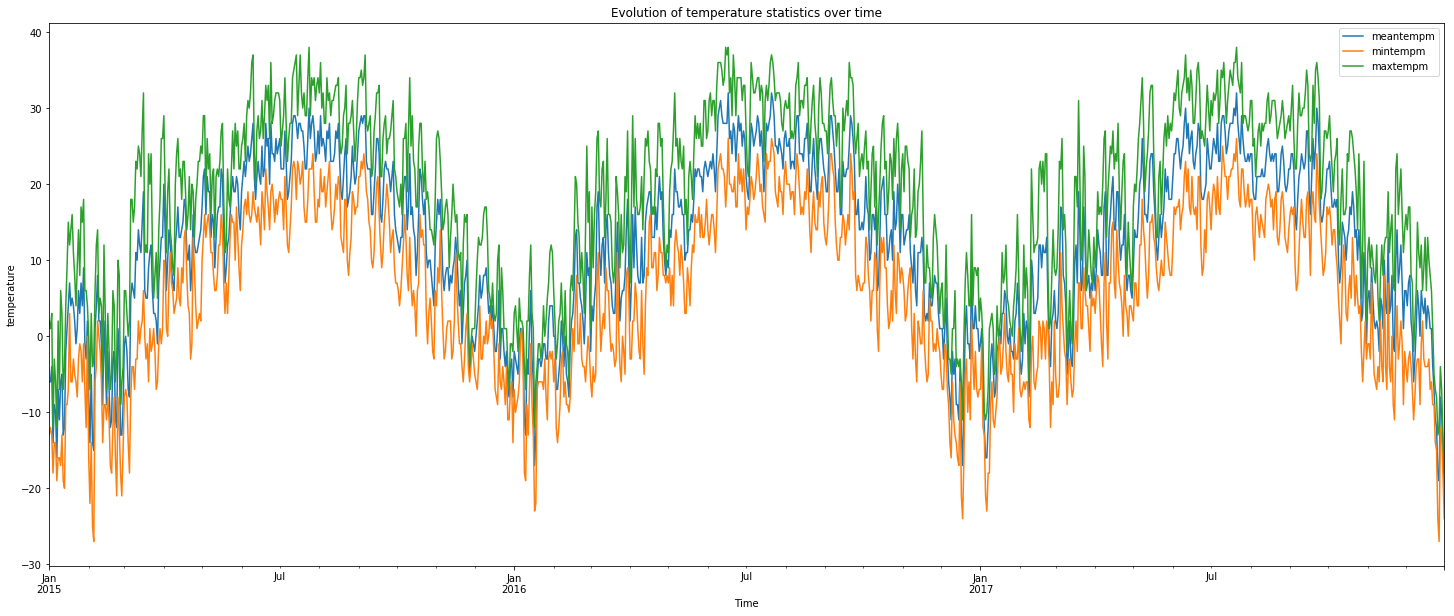

In [21]:
df.loc[:,['meantempm','mintempm','maxtempm']].plot()
plt.xlabel('Time')
plt.ylabel('temperature')
plt.title('Evolution of temperature statistics over time')

###### b. heat map

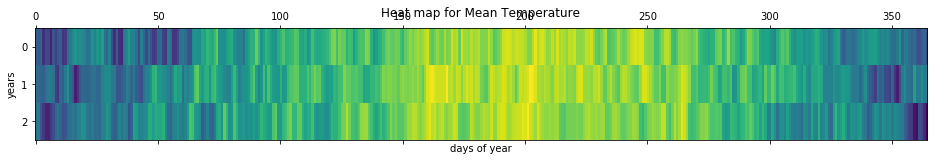

In [22]:
temperature=df['meantempm']
groups = temperature.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] =  pd.Series(group.values)
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.xlabel('days of year')
plt.ylabel('years')
plt.title('Heat map for Mean Temperature')
plt.show()

- Le Line plot montre très bien  un effet de saisonalité pour la variation de la température.
- Le heat map vient donner plus détail pour le Lineplot : les températures moyennes plus chaudes sont au milieu des années, et les températures moyennes plus fraîches sont au début et à la fin des années.

##### Dew point : 

###### a. Line plot : 

Text(0.5,1,'Evolution of dew point statistics over time')

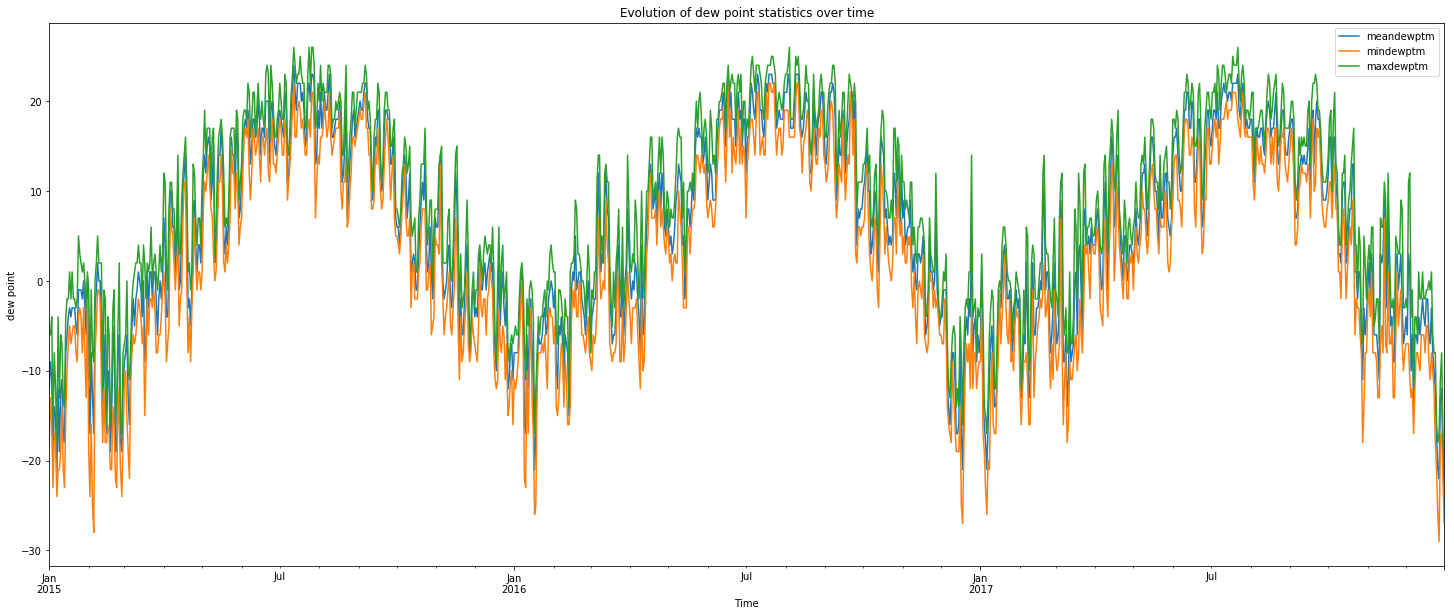

In [23]:
df.loc[:,['meandewptm','mindewptm','maxdewptm']].plot()
plt.xlabel('Time')
plt.ylabel('dew point')
plt.title('Evolution of dew point statistics over time')

###### b. Heatmap : 

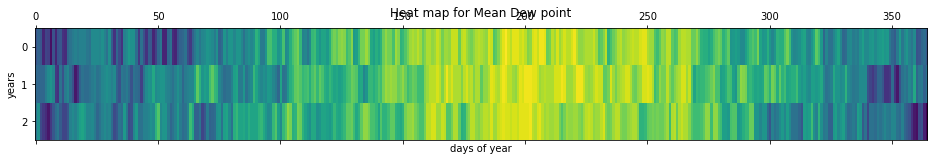

In [24]:
dewpoint=df['meandewptm']
groups = dewpoint.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] =  pd.Series(group.values)
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.xlabel('days of year')
plt.ylabel('years')
plt.title('Heat map for Mean Dew point')
plt.show()

- idem pour Dew point.
- On peut supposer qu'il ait une corrélation entre la température et le point de rosé puisqu'ils suivent les mêmes variations au cours des années.

##### Atmospheric pressure

###### a. Line Plot : 

Text(0.5,1,'Evolution of atmospheric pressure statistics over time')

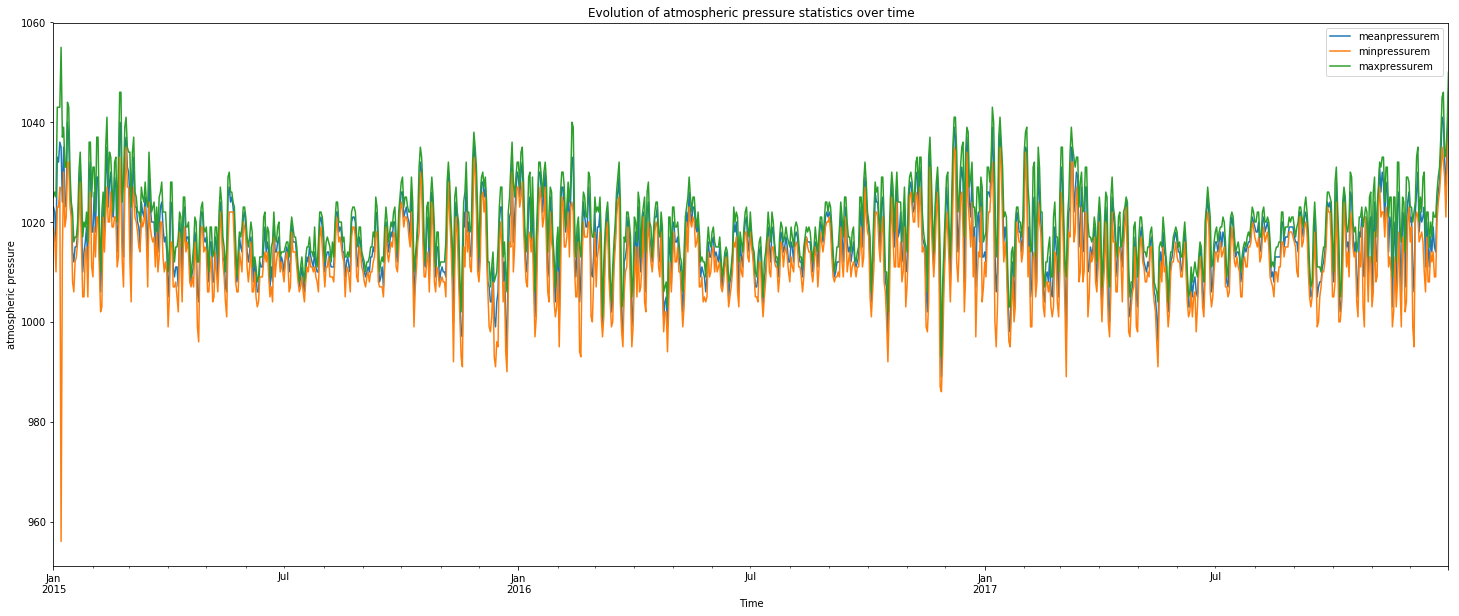

In [25]:
df.loc[:,['meanpressurem','minpressurem','maxpressurem']].plot()
plt.xlabel('Time')
plt.ylabel('atmospheric pressure')
plt.title('Evolution of atmospheric pressure statistics over time')

###### b. Heat map

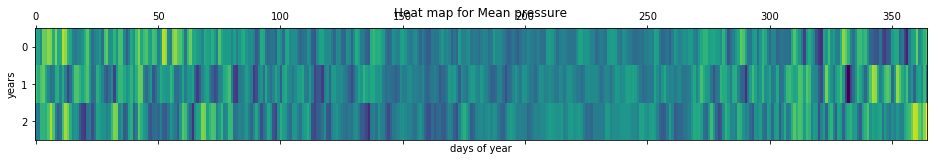

In [26]:
pressure=df['meanpressurem']
groups = pressure.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] =  pd.Series(group.values)
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.xlabel('days of year')
plt.ylabel('years')
plt.title('Heat map for Mean pressure')
plt.show()

-  Contrairement à la température et le point de rosé, la pression atmosphérique varient rapidement. On ne voit pas un effet  de saisonalité très claire, mais on peut supposer, grâce au heatmap, qu'il ait une corrélation négative entre la température et la pression atmosphérique.       

###### Humidity : 

###### a. Line plot :

Text(0.5,1,'Evolution of humidity statistics over time')

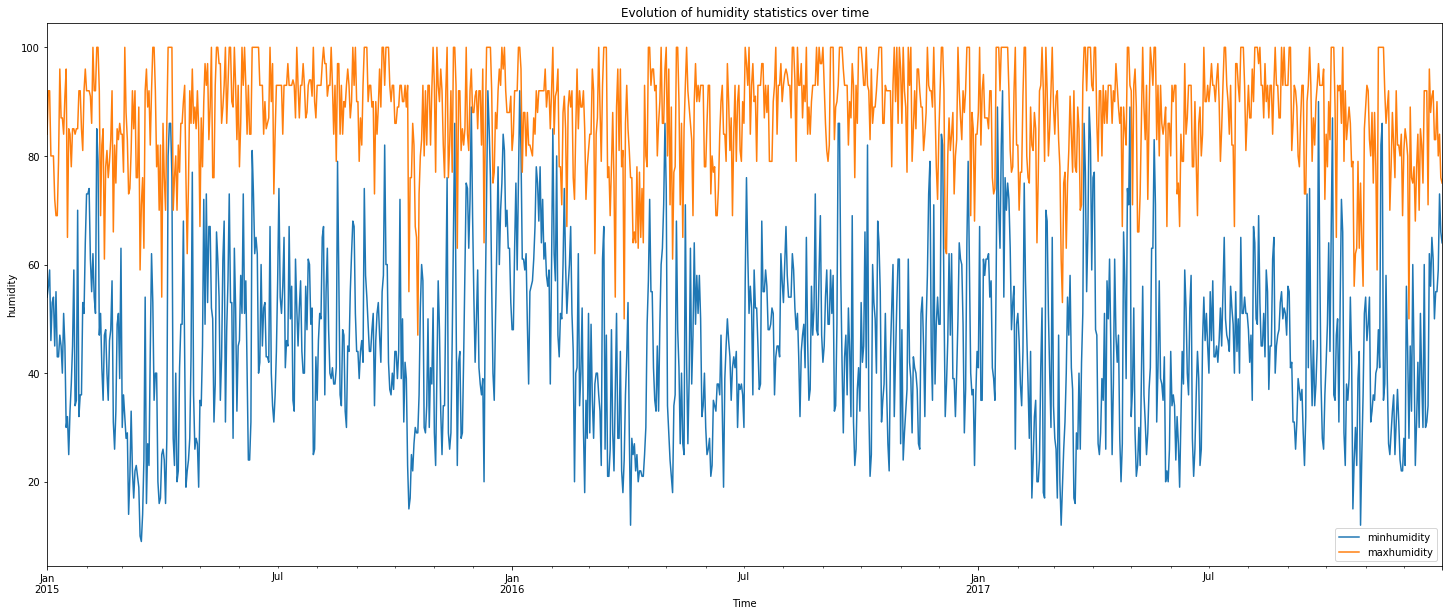

In [27]:
df.loc[:,['minhumidity','maxhumidity']].plot()
plt.xlabel('Time')
plt.ylabel('humidity')
plt.title('Evolution of humidity statistics over time')

###### b. Heat map 

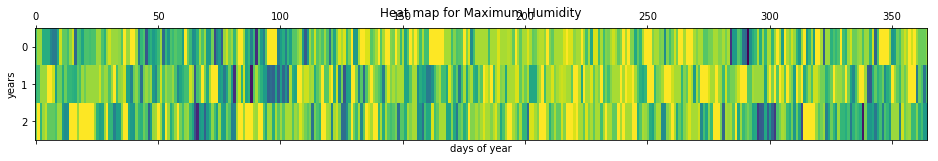

In [28]:
humidity_max=df['maxhumidity']
groups = humidity_max.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] =  pd.Series(group.values)
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.xlabel('days of year')
plt.ylabel('years')
plt.title('Heat map for Maximum Humidity')
plt.show()

- L'humidité semble varie aléatoirement au cours de l'année. Le heatmap peut confirmer nos dires. 

##### Precipitation

###### a. Line plot  

Text(0.5,1,'Evolution of precipm over time')

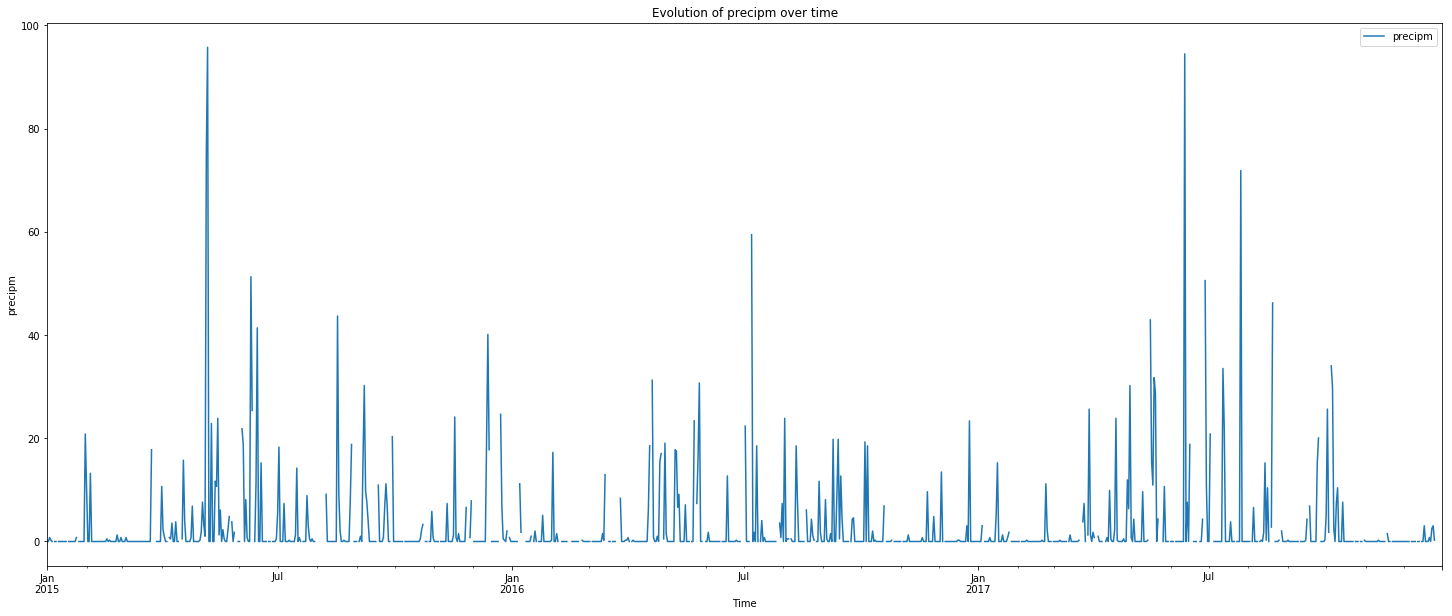

In [29]:
df.loc[:,['precipm']].plot()
plt.xlabel('Time')
plt.ylabel('precipm')
plt.title('Evolution of precipm over time')

###### b. Heat map

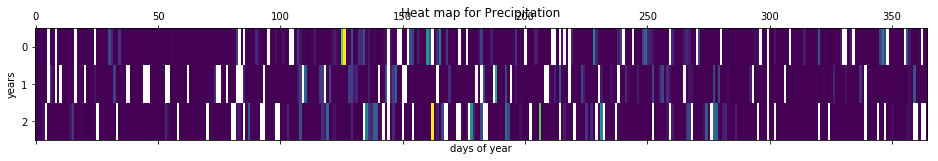

In [30]:
precipitation=df['precipm']
groups = precipitation.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] =  pd.Series(group.values)
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.xlabel('days of year')
plt.ylabel('years')
plt.title('Heat map for Precipitation')
plt.show()

<i> *La couleur blanche indique un manque de données</i>

- Idem pour la précipitation

##### Conclusion :

Je ne peux pas dire que le choix des variables effectué est optimal dans la mesure où je n'ai pas une connaissance parfaite de la météorologie, mais grâce à ma lecture du papier de recherche <b>"Machine Learning Applied to Weather Forecasting"</b> je vais utiliser les variables choisies ci-dessus et au lieu d'utiliser les 2 derniers jours pour le forecasting, je vais utiliser 3 jours. Ceci sera accompli dans la phase suivante.

## Préparation des données

### A : Dérivation des features : 

Cette partie consiste à créer des nouveaux features qui vont éventuellement nous aider à prédire la température moyenne. Pour chaque jour (ligne) et pour un feature donné (colonne), nous voulons trouver la valeur de ce feature N jours avant. Pour chaque valeur de N (1-3 dans notre cas), nous voulons faire une nouvelle colonne pour ce feature représentant la mesure du Nième jour précédent.

In [38]:
def derive_nth_day_feature(df, feature, N):  
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [39]:
for feature in features:  
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

In [43]:
#vérifications : 
df.columns

Index(['meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity',
       'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm',
       'maxpressurem', 'minpressurem', 'precipm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

### B. Nettoyage des données :